# Libraries

In [1]:
import sys
# path = r'C:\Users\wander\Documents\GitHub\PAREPYDEV_NEW'
# path = r'C:\Users\wande\OneDrive\Documentos\GitHub\PAREPY' # PC notebook wander
# path = r'C:\Users\UFG\Documents\github\PAREPY' # PC branco wander
path = r'C:\Users\rezio\OneDrive\Documentos\.git codes\PAREPY' # PC notebook luiz
sys.path.append(path)
import pandas as pd
pd.set_option('display.max_columns', None)

# Run

In [2]:
from parepy_toolbox import sampling_algorithm_structural_analysis
from obj_function import nowak_collins_example

# Variables setup
f = {'type': 'normal', 'parameters': {'mean': 40.3, 'sigma': 4.64}, 'stochastic variable': False}
p = {'type': 'gumbel max', 'parameters': {'mean': 10.2, 'sigma': 1.12}, 'stochastic variable': False}
w = {'type': 'lognormal', 'parameters': {'mean': 0.25, 'sigma': 0.025}, 'stochastic variable': False}
var = [f, p, w]

# Call the sampling algorithm directly with unpacked arguments
results, pf, beta = sampling_algorithm_structural_analysis(
    objective_function=nowak_collins_example,
    number_of_samples=1000,
    numerical_model={'model sampling': 'lhs'},
    variables_settings=var,
    number_of_limit_functions=1,
    none_variable=None,
    name_simulation=None
)


In [3]:
pf_list = pf.values.flatten().tolist()
beta_list = beta.values.flatten().tolist()
for i, (p, b) in enumerate(zip(pf_list, beta_list)):
    print(f"State Limite function (g): {i}, pf: {p:.6f}, beta: {b:.6f}")

State Limite function (g): 0, pf: 0.001000, beta: 3.090232


In [ ]:
from parepy_toolbox import sampling_algorithm_structural_analysis
from obj_function import nowak_collins_example

f = {'type': 'normal', 'parameters': {'mean': 40.3, 'sigma': 4.64}, 'stochastic variable': False}
p = {'type': 'gumbel max', 'parameters': {'mean': 10.2, 'sigma': 1.12}, 'stochastic variable': False}
w = {'type': 'lognormal', 'parameters': {'mean': 0.25, 'sigma': 0.025}, 'stochastic variable': False}
var = [f, p, w]

results, pf, beta = sampling_algorithm_structural_analysis(
    objective_function=nowak_collins_example,
    number_of_samples=1000,
    numerical_model={'model sampling': 'lhs'},
    variables_settings=var,
    number_of_limit_functions=1,
    none_variable=None,
    name_simulation=None,
    verbose=True
)


18:03:06 - Checking input parameters...
18:03:06 - Input check passed.
18:03:06 - Starting limit state function evaluation (g)...
18:03:08 - Finished (g) evaluation in 2.85e+00 seconds.
18:03:08 - Starting evaluation of failure probability and reliability index (beta)...
18:03:08 - Finished Pf and beta evaluation in 1.79e-02 seconds.
18:03:08 - Simulation completed without saving.


In [5]:
results

,X_0,X_1,X_2,R_0,S_0,G_0,I_0
0,46.492204,9.253273,0.225867,3719.376312,1816.932548,1902.443764,0.0
1,43.202690,10.278314,0.243635,3456.215178,1975.909679,1480.305499,0.0
2,38.613858,10.370294,0.248457,3089.108605,2008.995669,1080.112936,0.0
3,44.734084,12.984081,0.246302,3578.726718,2137.573475,1441.153243,0.0
4,39.686021,10.703733,0.230196,3174.881714,1920.502321,1254.379393,0.0
...,...,...,...,...,...,...,...
995,36.817533,10.722138,0.257367,2945.402630,2079.960826,865.441804,0.0
996,45.173816,8.585063,0.235322,3613.905312,1835.994025,1777.911287,0.0
997,43.445865,10.277237,0.258684,3475.669226,2063.613437,1412.055790,0.0
998,46.870158,8.738007,0.229180,3749.612626,1808.429670,1941.182956,0.0


In [6]:
colunas_x = [col for col in results.columns if str(col).startswith("X_")]

for index, row in results.iterrows():
    valores_x = row[colunas_x].tolist()
    print(f"Linha {index}: {valores_x}")

Linha 0: [46.4922038964437, 9.253273354855933, 0.2258669043891007]
Linha 1: [43.2026897234719, 10.278314350114128, 0.24363523737631504]
Linha 2: [38.61385755722831, 10.370293684244476, 0.24845675753643567]
Linha 3: [44.73408397503606, 12.984081056337303, 0.24630197157990938]
Linha 4: [39.68602142710983, 10.703733223483356, 0.23019559797485814]
Linha 5: [38.303687155893805, 10.08502084712694, 0.27587450410375786]
Linha 6: [43.74815859251888, 9.851069115888222, 0.23979713977148834]
Linha 7: [34.46918096149421, 10.362957063090175, 0.2637838948986767]
Linha 8: [42.96278801976086, 10.320686971946547, 0.21911826886500585]
Linha 9: [39.16130006941906, 11.555670243327949, 0.24409754685067545]
Linha 10: [33.70716083925855, 9.10346129446965, 0.23369986753487965]
Linha 11: [44.360781858236926, 11.623539673890216, 0.25457504881875115]
Linha 12: [33.86829581301783, 10.625121465556873, 0.24576139299270794]
Linha 13: [42.471858733301765, 9.660882917362308, 0.22797866864055466]
Linha 14: [35.680952850

In [7]:
from tabulate import tabulate
table = tabulate(results, headers='keys', tablefmt='psql')
print(table)

+-----+---------+----------+----------+---------+---------+-----------+-------+
|     |     X_0 |      X_1 |      X_2 |     R_0 |     S_0 |       G_0 |   I_0 |
|-----+---------+----------+----------+---------+---------+-----------+-------|
|   0 | 46.4922 |  9.25327 | 0.225867 | 3719.38 | 1816.93 | 1902.44   |     0 |
|   1 | 43.2027 | 10.2783  | 0.243635 | 3456.22 | 1975.91 | 1480.31   |     0 |
|   2 | 38.6139 | 10.3703  | 0.248457 | 3089.11 | 2009    | 1080.11   |     0 |
|   3 | 44.7341 | 12.9841  | 0.246302 | 3578.73 | 2137.57 | 1441.15   |     0 |
|   4 | 39.686  | 10.7037  | 0.230196 | 3174.88 | 1920.5  | 1254.38   |     0 |
|   5 | 38.3037 | 10.085   | 0.275875 | 3064.29 | 2153.49 |  910.804  |     0 |
|   6 | 43.7482 |  9.85107 | 0.239797 | 3499.85 | 1930.45 | 1569.4    |     0 |
|   7 | 34.4692 | 10.363   | 0.263784 | 2757.53 | 2097.99 |  659.547  |     0 |
|   8 | 42.9628 | 10.3207  | 0.219118 | 3437.02 | 1835.21 | 1601.81   |     0 |
|   9 | 39.1613 | 11.5557  | 0.244098 | 

In [8]:
from parepy_toolbox import sampling_algorithm_structural_analysis
from obj_function import nowak_collins_time_example
import numpy as np

# Define random variables
f = {
    'type': 'normal',
    'parameters': {'mean': 40.3, 'sigma': 4.64},
    'stochastic variable': False
}

p = {
    'type': 'gumbel max',
    'parameters': {'mean': 10.2, 'sigma': 1.12},
    'stochastic variable': False
}

w = {
    'type': 'lognormal',
    'parameters': {'mean': 0.25, 'sigma': 0.025},
    'stochastic variable': False
}

# List of variables
var = [f, p, w]

# Time steps
time_steps = 5
time_vector = list(np.linspace(0, 50, num=time_steps, endpoint=True))

# Run simulation
results, pf, beta = sampling_algorithm_structural_analysis(
    objective_function=nowak_collins_time_example,
    number_of_samples=70000,
    numerical_model={'model sampling': 'mcs-time', 'time steps': time_steps},
    variables_settings=var,
    number_of_limit_functions=1,
    none_variable={'time analysis': time_vector},
    name_simulation=None,
    verbose=True 
)


18:03:09 - Checking input parameters...
18:03:09 - Input check passed.
18:03:09 - Starting limit state function evaluation (g)...
18:03:16 - Finished (g) evaluation in 7.22e+00 seconds.
18:03:16 - Starting evaluation of failure probability and reliability index (beta)...
18:03:16 - Finished Pf and beta evaluation in 2.84e-02 seconds.
18:03:16 - Simulation completed without saving.


In [9]:
pf_list = pf['G_0'].tolist()
beta_list = beta['G_0'].tolist()
for i, (p, b) in enumerate(zip(pf_list, beta_list)):
    print(f"Time step (id={i}, time={setup['none variable']['time analysis'][i]}), pf: {p:.6f}, beta: {b:.6f}")

NameError: name 'setup' is not defined

C:\Users\rezio\AppData\Local\Temp\ipykernel_12284\2470366457.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


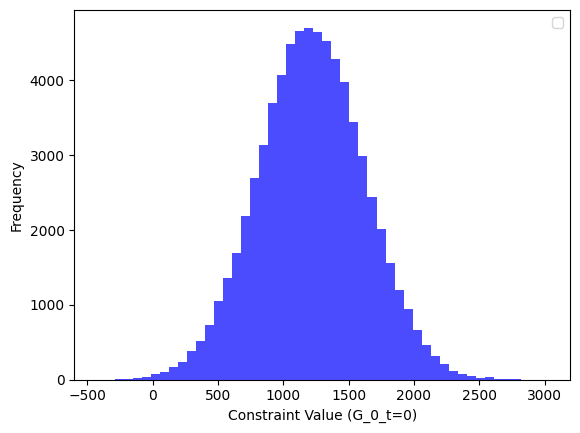

Most Probable Points Near Failure (G_0_t=0 >= 0):
         X_0_t=0    X_0_t=1    X_0_t=2    X_0_t=3    X_0_t=4    X_1_t=0  \
67304  29.842892  29.842892  29.842892  29.842892  29.842892   9.098697   
24157  33.340789  33.340789  33.340789  33.340789  33.340789  12.806648   
20977  25.113712  25.113712  25.113712  25.113712  25.113712  10.887936   

         X_1_t=1    X_1_t=2    X_1_t=3    X_1_t=4   X_2_t=0   X_2_t=1  \
67304   9.098697   9.098697   9.098697   9.098697  0.324633  0.324633   
24157  12.806648  12.806648  12.806648  12.806648  0.338171  0.338171   
20977  10.887936  10.887936  10.887936  10.887936  0.243081  0.243081   

        X_2_t=2   X_2_t=3   X_2_t=4  STEP_t_0  STEP_t_1  STEP_t_2  STEP_t_3  \
67304  0.324633  0.324633  0.324633       0.0       1.0       2.0       3.0   
24157  0.338171  0.338171  0.338171       0.0       1.0       2.0       3.0   
20977  0.243081  0.243081  0.243081       0.0       1.0       2.0       3.0   

       STEP_t_4      R_0_t=0      R_0_t

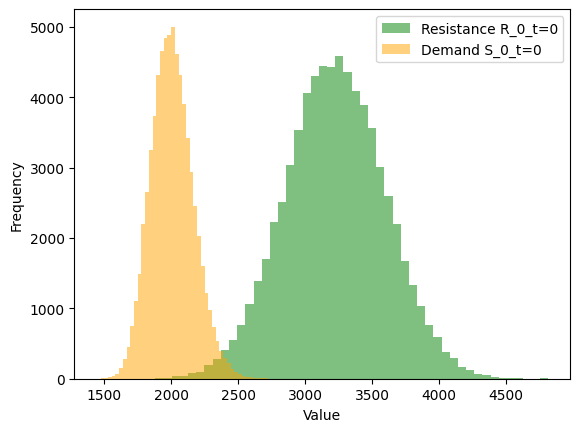

G_0 - p_f: 0.001357, β: 2.998369


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Plot histogram of G_0_t=0
plt.hist(results['G_0_t=0'], bins=50, alpha=0.7, color='blue')
plt.xlabel("Constraint Value (G_0_t=0)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# 2. Find the three most probable points near zero for G_0_t=0
## 2.1 Sort the results by G_0_t=0 >=0
sorted_positive = results[results['G_0_t=0'] >= 0].sort_values(by='G_0_t=0', ascending=True)
print('Most Probable Points Near Failure (G_0_t=0 >= 0):')
print(sorted_positive.head(3))

## 2.2 Sort the results by G_0_t=0 <=0
sorted_negative = results[results['G_0_t=0'] <= 0].sort_values(by='G_0_t=0', ascending=False)
print('Most Probable Points Near Failure (G_0_t=0 <= 0):')
print(sorted_negative.head(3))


# 3. Overlay histograms for R_0_t=0 and S_0_t=0
plt.hist(results['R_0_t=0'], bins=50, alpha=0.5, color='green', label='Resistance R_0_t=0')
plt.hist(results['S_0_t=0'], bins=50, alpha=0.5, color='orange', label='Demand S_0_t=0')
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# 4. Convert pf and beta to lists
pf_list = pf.iloc[:, :].values.flatten().tolist()
beta_list = beta.iloc[:, :].values.flatten().tolist()

# 5. Iterate through reliability results for constraints
for pf_column, beta_column, (pf_value, beta_value) in zip(pf.columns, beta.columns, zip(pf_list, beta_list)):
    print(f"{pf_column} - p_f: {pf_value:.6f}, β: {beta_value:.6f}")
